In [2]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt


def get_updated_central_graph_with_random_edges_fixed_mdeg_connected(n_nodes=100, p_change=0.0):

    G = get_updated_central_graph_with_random_edges_fixed_mdeg_disconnected(n_nodes=n_nodes, p_change=p_change)

    # check if the network is connected
    if (nx.is_connected(G)):
        # print("The network is already connected")
        pass
    else:
        # add links from random components to another random component until the network becomes connected
        while (not nx.is_connected(G)):
            # find the components
            components = list(nx.connected_components(G))
            # pick two random components without repetition at the same time
            component_picked = np.random.choice(len(components), 2, replace=False)
            component_1 = component_picked[0]
            component_2 = component_picked[1]
            # pick a random node from each component
            node_1 = np.random.choice(list(components[component_1]))
            node_2 = np.random.choice(list(components[component_2]))
            # add an edge between the two nodes
            G.add_edge(node_1, node_2)
    return G


def get_updated_central_graph_with_random_edges_fixed_mdeg_disconnected(n_nodes=100, p_change=0.0):
    # make a warning if p_change is greater than 1
    if (p_change > 1):
        print("WARNING!! p_change is greater than 1. It is set to 1.")
        p_change = 1

    adjc = np.zeros((n_nodes, n_nodes))
    adjc[0, 1:] = 1  # making it a star graph
    adjc = adjc + adjc.T  # making it symmetric

    # create a random matrix for adding edges
    mat_pot_add_edge = np.random.rand(n_nodes, n_nodes)

    # make the lower triangle of mat_potential_add_edge zero
    mat_pot_add_edge = np.triu(mat_pot_add_edge, 1)

    # make sure that the diagonal elements are not selected to be added => the value is zero
    mat_pot_add_edge = mat_pot_add_edge + np.zeros(n_nodes)

    # the edges with random variable greater than (1-p_change) will be added
    adding_link = mat_pot_add_edge > (1 - p_change)
    adding_link = adding_link + adding_link.T

    # compare the adding_link with adjc, and see how many edges should be added
    # make a difference of the two matrices
    new_links_mat = np.logical_and(adding_link, np.logical_not(adjc))

    # calculate number of edges to be removed, based on the adding links and the number of mutual links
    # it should be divided by 2, because the removing_link will be forced to be symmetric
    n_edges_to_be_removed = int(np.sum(new_links_mat) / 2)

    # update the adjc by adding the new links
    adjc = adjc + new_links_mat

    # pick n_edges_to_be_removed edges randomly from the adjc and remove them
    # find the indices of the edges
    edge_indices = np.where(np.triu(adjc, 1))
    # pick n edges_to_be_removed edges randomly without repetition
    edge_indices_to_be_removed = np.random.choice(len(edge_indices[0]), n_edges_to_be_removed, replace=False)

    # remove the edges
    for i_edge in edge_indices_to_be_removed:
        if (adjc[edge_indices[0][i_edge], edge_indices[1][i_edge]] == 0):
            print("ERROR: the edge is already removed")
        adjc[edge_indices[0][i_edge], edge_indices[1][i_edge]] = 0
        adjc[edge_indices[1][i_edge], edge_indices[0][i_edge]] = 0

    G = nx.from_numpy_array(adjc)

    return G


In [45]:
G = get_updated_central_graph_with_random_edges_fixed_mdeg_connected(n_nodes=100, p_change=0.15)

In [102]:


# nx.draw(G, with_labels=True)
# plt.show()

n_agents = 100;

# np_G = nx.adjacency_matrix(G).toarray()
# degree = np_G.sum(axis=0)
# degree = G.degree()[:, 1]
degree_ratio = degree / n_agents;
# normalize degree_ratio so that the minimum is 0 and the maximum is 1
degree_norm = (degree_ratio - np.min(degree_ratio)) / (np.max(degree_ratio) - np.min(degree_ratio))
degree_norm = np.sort(degree_norm)

scale_meas_std = 1.
# linear correlation
measurement_noise_std = scale_meas_std* (1 - degree_norm)
measurement_noise_std_2 = scale_meas_std* (degree_norm)

# exponential correlation
# measurement_noise_std = scale_meas_std * np.exp(cor_coef * degree_norm)
# measurement_noise_std_2 = scale_meas_std * (np.exp(cor_coef) - np.exp(cor_coef * degree_norm))

# nonlinear correlation
Gamma = -1.0 # a: positive correlation
b = 2 # nonlinear parameter
epsilon = 10**-10

measurement_noise_std = Gamma*degree_norm**b - 0.5*(1-np.sign(Gamma))*Gamma + epsilon


measurement_noise_std = net_inf_cor_generator(degree_norm, Gamma=10, b = 5)
plt.plot(degree_norm, measurement_noise_std, 'g-o')
# plt.plot(degree_norm, measurement_noise_std_2, 'k-o')

# make a twin axis and show the normalized measuremet noise std
# ax2 = plt.twinx()
# ax2.plot(degree_norm, measurement_noise_std / np.max(measurement_noise_std), '-*', color='red')
# ax2.plot(degree_norm, measurement_noise_std_2 / np.max(measurement_noise_std_2), '-*', color='b')

[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10
 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10]


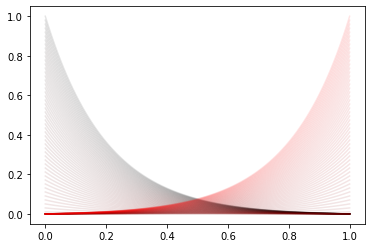

In [90]:
x = np.linspace(0, 1, 100)

Gamma = 10;
b = 1;
a = Gamma/(np.exp(b) - 1)
c = -a


y = a*np.exp(b*x) + c

Gamma = 10;
b = 20;
a = Gamma/(np.exp(b) - 1)
c = -a
y2 = a*np.exp(b*x) + c

Gamma = -10
a = Gamma/(np.exp(b) - 1)
c = -a
y_n = -a*np.exp(-b*(x-1)) - c

def net_inf_cor_generator(x, Gamma=1, b=5):
    a = Gamma / (np.exp(b) - 1)
    c = -a
    if(Gamma>0):
        y = a * np.exp(b * x) + c
    else:
        y = -a * np.exp(-b * (x - 1)) - c

    y = y + 10**-10
    return y

print(net_inf_cor_generator(x, 0, 1))

gamma_arr = np.linspace(-1, 1, 100)

for gamma in gamma_arr:
    y = net_inf_cor_generator(x, gamma, 5)
    plt.plot(x, y, color=((gamma+1)/2, 0, 0), alpha=0.1)

# y_gen = a*np.exp(b*x+b>0) + c

# plt.plot(x,y,'b')
# plt.plot(x,y2,'r')
# plt.plot(x,y_n,'k')

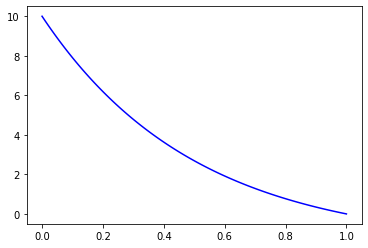

In [76]:
y = a*np.exp(b*x) + c
y_n = a*np.exp(-b*(x-1)) + c
plt.plot(x,y,'b')

In [61]:
measurement_noise_std

array([6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 6.83014455e-05, 6.83014455e-05,
       6.83014455e-05, 6.83014455e-05, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
       1.09282163e-03, 1.09282163e-03, 1.09282163e-03, 1.09282163e-03,
      